<a href="https://colab.research.google.com/github/PriyankaDataAnalyst/SMS-SPAM-CLASSIFIER/blob/main/SMS_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Markdown

Markdown('# SMS SPAM CLASSIFIER')




# SMS SPAM CLASSIFIER

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle as pk
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [ ]:
data = pd.read_csv('/spam.csv', encoding='ISO-8859-1', usecols=[0, 1])
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
Markdown('## DATA EXPLORATION')

## DATA EXPLORATION

In [ ]:
data.shape

(5572, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [ ]:
data.describe(include='object').transpose()

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30


In [ ]:
data[data.duplicated()]

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [ ]:
data.v1.value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
Markdown('## DATA VISULAIZATION')

## DATA VISULAIZATION

<ipython-input-13-8fe62f961dee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='v1',data=data,palette='Blues')


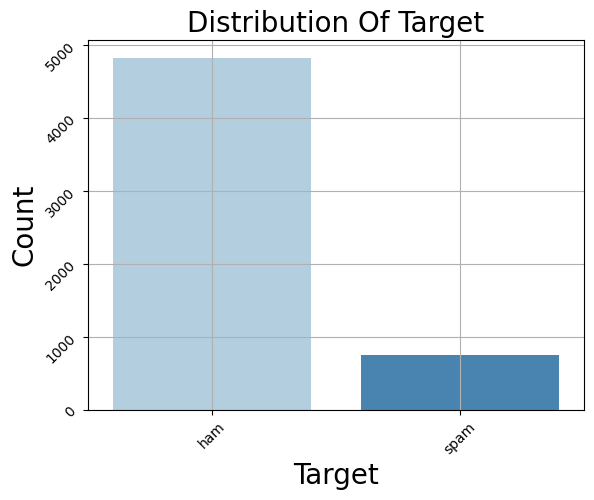

In [ ]:
sns.countplot(x='v1',data=data,palette='Blues')
plt.title('Distribution Of Target',fontsize=20)
plt.xlabel('Target',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

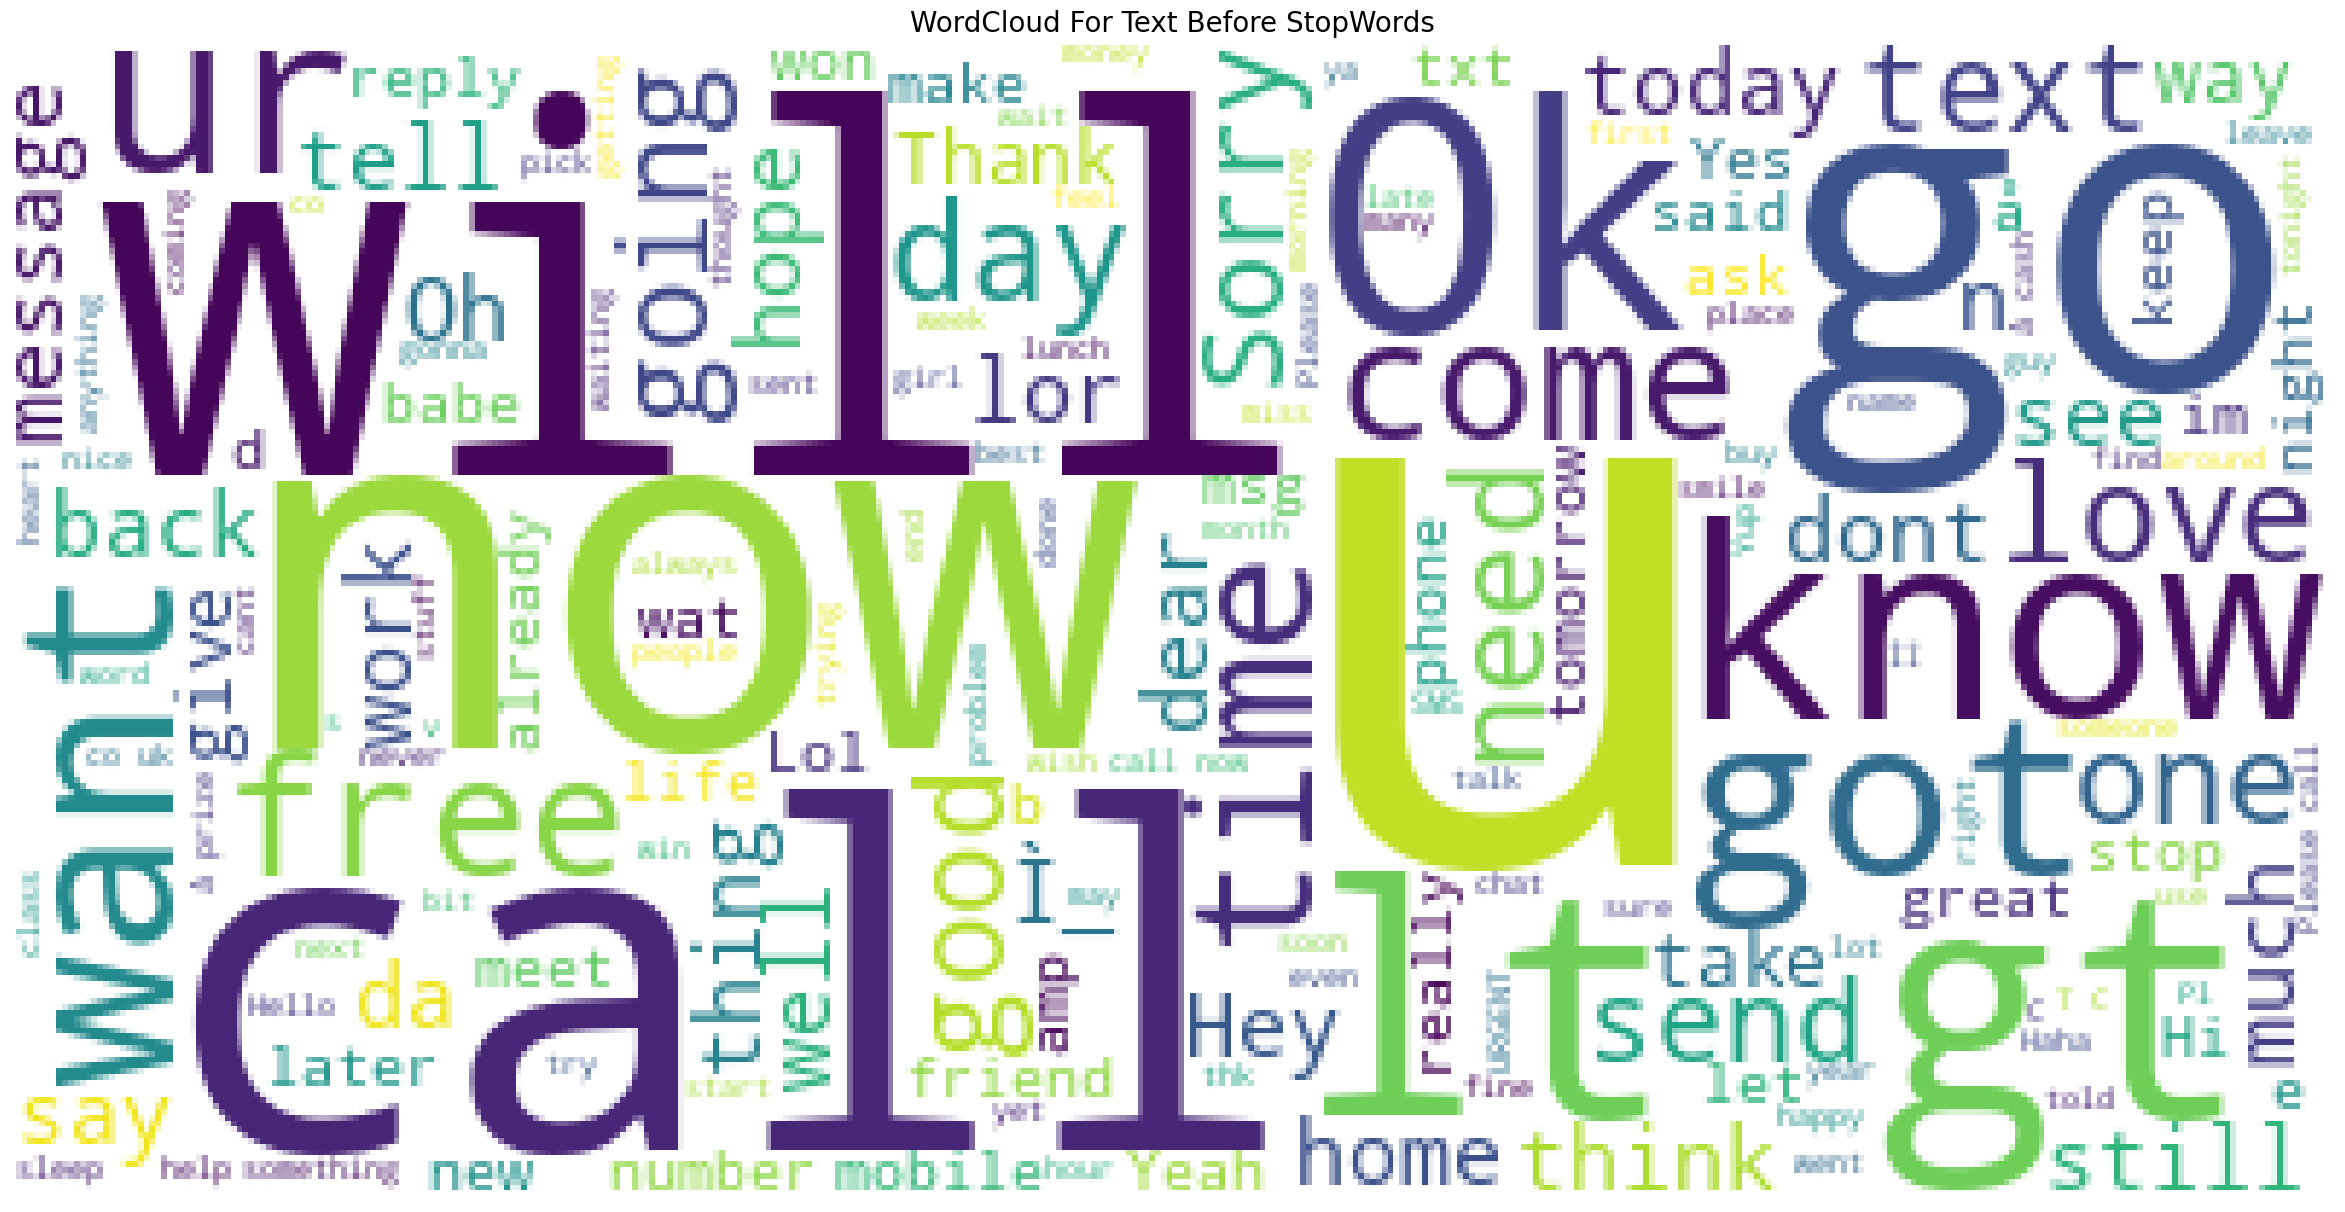

In [ ]:
from nltk.corpus import stopwords
plt.figure(figsize=(30,20))

plt.imshow(WordCloud(background_color = 'white').generate(" ".join(data.v2)))
plt.axis("off")
plt.title("WordCloud For Text Before StopWords",fontsize=20)
plt.show()


In [ ]:
Markdown('## MODEL BUILDING')

## MODEL BUILDING

In [ ]:
Text=data.v2
Text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [ ]:
Target=data.v1
Target

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [ ]:
#Transform Output
Target.replace('spam',1,inplace=True)
Target.replace('ham',0,inplace=True)
Target

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [ ]:
#Split Data
X_train,X_test,y_train,y_test=train_test_split(Text,Target,test_size=.2,shuffle=True,random_state=44)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (4457,)
X_test Shape : (1115,)
y_train Shape : (4457,)
y_test Shape : (1115,)


In [ ]:
#Model
model=Pipeline([
    ('tfid',TfidfVectorizer()),
    ('model',MultinomialNB(alpha=.1))
    ])
model.fit(X_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=0.1))])

In [ ]:
Markdown('## MODEL CHECK')

## MODEL CHECK

In [ ]:
print('Pipeline Model Train Score is : ' , model.score(X_train, y_train))
print('Pipeline Model Test Score is : ' , model.score(X_test, y_test))

Pipeline Model Train Score is :  0.9982050706753421
Pipeline Model Test Score is :  0.9811659192825112


In [ ]:
y_pred=model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

,Actual,Predicted
5243,0,0
2572,0,0
4466,0,0
4009,1,1
2021,0,0
...,...,...
3493,1,1
2140,0,0
3650,0,0
3260,0,0


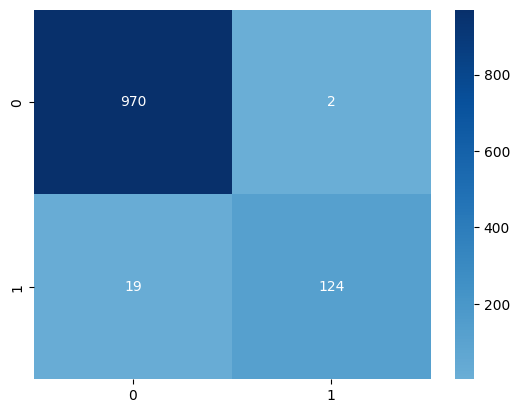

array([[970,   2],
       [ 19, 124]])

In [ ]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues')
plt.show()
CM

In [ ]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.98      1.00      0.99       972
           1       0.98      0.87      0.92       143

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
Markdown('## The result will get a 98% accuracy')

## The result will get a 98% accuracy

In [ ]:
pk.dump(model , open('model.sav','wb'))

In [ ]:
saved_model=pk.load(open('model.sav','rb'))